# 1. INTRODUCTION

The high incidence of complaints from consumers shows the importance of an analysis that demands broad intervention. The present project uses a dataset representing all the complaints from consumers regarding financial institutions in order to explore ways of actionable insights by analyzing sentiments. Using the Natural Language Toolkit (NLTK) and Python libraries, such as pandas and matplotlib, the data undergoes processing, analysis, and visualization to detect reasons for customer dissatisfaction and common patterns thereof. The insights garnered so far are among the most powerful information, which includes states such as Florida, Texas, and California selling the most complaints, typically on credit report errors. So increase the intensity and unravel the sentiment behind these complaints.


In [1]:
import pandas as pd
import numpy as np
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')
import re
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zethayn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Zethayn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('complaints.xlsx')

In [4]:
df.head()

,Date received,Financial Service Type,product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MD,21212,NaN,NaN,Web,2024-12-24,In progress,Yes,NaN,11250735
1,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75495,NaN,NaN,Web,2024-12-24,In progress,Yes,NaN,11250736
2,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Unable to get your credit report or credit score,Other problem getting your report or credit score,NaN,NaN,Experian Information Solutions Inc.,IL,60619,NaN,NaN,Web,2024-12-24,In progress,Yes,NaN,11250858
3,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,AZ,85295,NaN,NaN,Web,2024-12-24,In progress,Yes,NaN,11250873
4,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,RI,2908,NaN,NaN,Web,2024-12-24,In progress,Yes,NaN,11250874


In [5]:
df = df[['Consumer complaint narrative', 'Issue','product', 'State' ]]

<h3>Number of observations per State</h3>

<AxesSubplot:xlabel='State'>

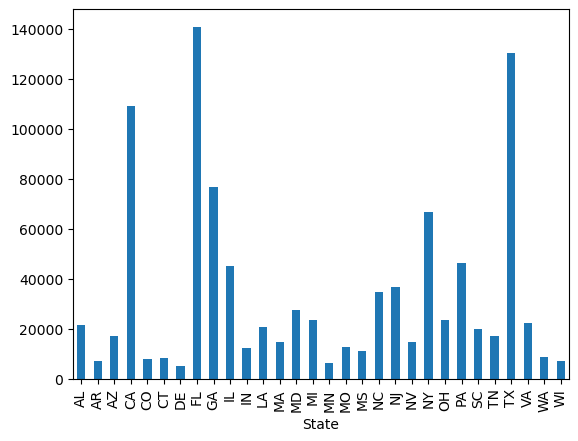

In [6]:
grouped = df.groupby('State').size()
filtered = grouped[grouped > 5000]
filtered.plot(kind='bar')

Florida, Texas, and California see the most user complaints.

<AxesSubplot:xlabel='Issue'>

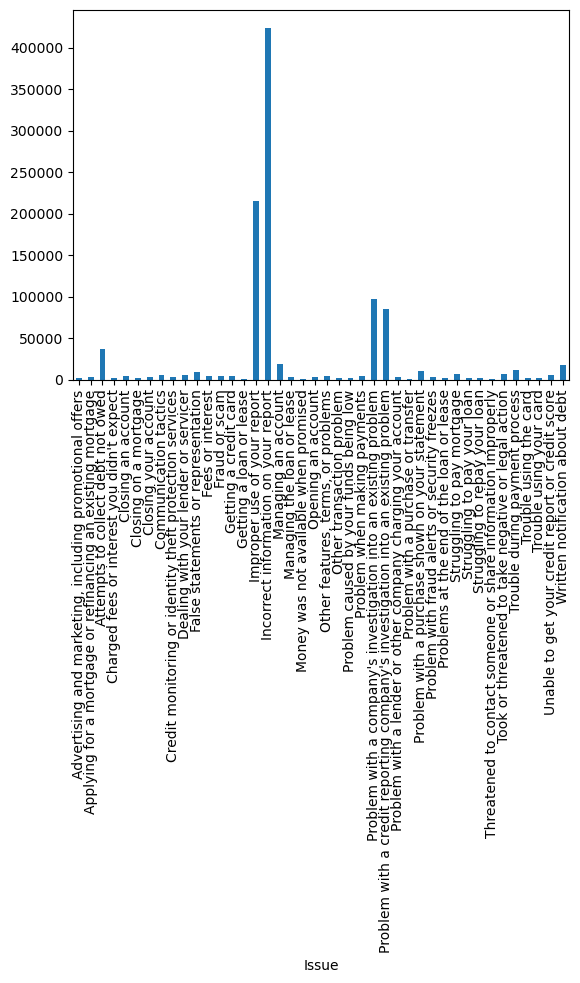

In [7]:
grouped = df.groupby('Issue').size()
filtered = grouped[grouped > 1000]
filtered.plot(kind='bar')

We can see that many Issues repeated over a 1000 times, where "Incorrect information on your report" was the most often repeated complaint (40'000+), 'Improper use of your report' was twice less common, and complaints regarding the handling of the orinal issue were both repeated some 1'000 times. We can hypothesize that the sentiment of the complaints regarding the incorrect handling of reports will be lower.


# 2. **DATA PREPROCESSING**

Data preprocessing is an essential step to sustain the corpus for analysis to enable the quality of the system. In doing so, steps to take care of these issues include cleaning (taking care of missing values, removing duplicates, standardizing text formats), followed by text preprocessing on tokenization and stopword removal, lemmatization and punctuation removal to put text into well-structured format for analysis. Word frequency visualizations present the most common terms for thematic analysis.


Text Preprocessing: Since the data will consist of textual complaints, we will perform the following:
*   Tokenization
*   Lowercasing
*   Removal of stopwords
*   Lemmatization/Stemming
*   Removing punctuation and non-alphabetic characters

In [8]:
df_cleaned = df.dropna(subset=['Consumer complaint narrative'])

## a. Lowercasing

In [9]:
def clean_text(text):
    if not isinstance(text, str):  # Check if the input is a string
        return text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\b\d{1,5}\s+usc\b', '', text, flags=re.IGNORECASE)  # Remove legal references
    text = re.sub(r'[x]{2,}', '', text)
    return re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)

In [10]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.lower()

## b. Removing punctuation and non-alphabetic characters




In [11]:
import string
import pandas as pd
punc = string.punctuation

def remove_punc(text):
    if not isinstance(text, str):
        return text
    return text.translate(str.maketrans('', '', punc))

df["Consumer complaint narrative"] = df["Consumer complaint narrative"].apply(remove_punc)

## c. Removal of stopwords

In [12]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return text
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df["Consumer complaint narrative"] = df["Consumer complaint narrative"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zethayn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## d. Tokenization

In [13]:
def tokenize_text(text):
    if isinstance(text, str):
        return text.split()
    return []

df['Tokenized Text'] = df['Consumer complaint narrative'].apply(tokenize_text)

print(df[['Consumer complaint narrative', 'Tokenized Text']].head())

all_tokens = ' '.join([' '.join(tokens) for tokens in df['Tokenized Text']])
word_counts = Counter(all_tokens.split())

print(word_counts.most_common(10))

  Consumer complaint narrative Tokenized Text
0                          NaN             []
1                          NaN             []
2                          NaN             []
3                          NaN             []
4                          NaN             []
[('xxxx', 4120831), ('credit', 661184), ('account', 513413), ('xxxxxxxx', 383257), ('report', 378049), ('information', 369419), ('reporting', 289607), ('consumer', 280051), ('accounts', 172250), ('payment', 161238)]


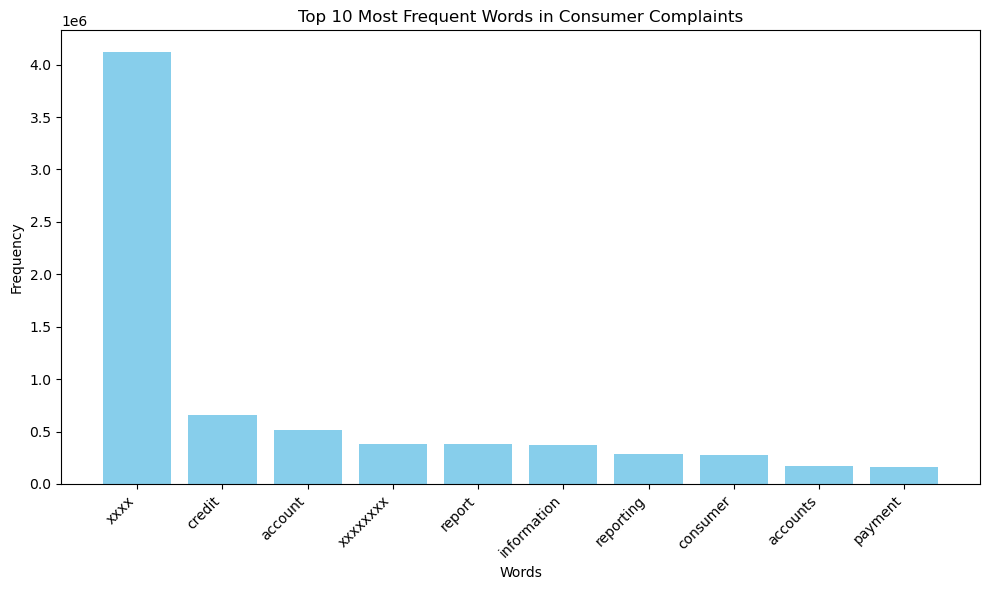

In [14]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')

all_narratives = ' '.join(df['Consumer complaint narrative'])

word_counts = Counter(all_narratives.split())

most_common_words = word_counts.most_common(10)

words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Frequent Words in Consumer Complaints')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Therefore, tokenized complaints are a great insight into customers' experiences with financial institutions. For example, the words "credit," "account," and "report" are the most frequent words that reflect common issues reported by the consumers. Techniques such as visualizing word frequencies through a bar chart of the top 10 most frequent words enable efficient and intuitive comprehension of trends in data. The processed data, after enrichment with structured tokens and their sentiment scores, forms the foundation for deeper sentiment analysis using VADER's SentimentIntensityAnalyzer. Complaints can also be categorized as per the polarity of the sentiment, through which we find areas that need immediate attention and thus help financial institutions develop better services and customer relations.

The code attempts to drop empty strings and NaNs on the "Consumer complaint narrative" column through *dropna* and a length filter. After these operations, several such rows exist that have an empty string in that column; this could be because some files handle missing data differently.

In [15]:
df.head()
df_cleaned = df.dropna(subset=['Consumer complaint narrative'])
df_cleaned = df[df['Consumer complaint narrative'].str.len() > 0]
df

,Consumer complaint narrative,Issue,product,State,Tokenized Text
0,,Incorrect information on your report,Credit reporting,MD,[]
1,,,Credit reporting,TX,[]
2,,Unable to get your credit report or credit score,Credit reporting,IL,[]
3,,Incorrect information on your report,Credit reporting,AZ,[]
4,,Incorrect information on your report,Credit reporting,RI,[]
...,...,...,...,...,...
1048570,,Improper use of your report,Credit reporting,FL,[]
1048571,last year found lot information credit bureaus...,Incorrect information on your report,Credit reporting,MO,"[last, year, found, lot, information, credit, ..."
1048572,wife separated since xxxx hold title home join...,Trouble during payment process,Conventional home mortgage,OH,"[wife, separated, since, xxxx, hold, title, ho..."
1048573,xxxx xxxx xxxx account xxxx appearing xxxx xxx...,Attempts to collect debt not owed,Other debt,CA,"[xxxx, xxxx, xxxx, account, xxxx, appearing, x..."


## e. Stemming

The text preprocessing function preprocess_text cleans the complaint narratives by removing punctuation, tokenizing, and applying stemming using NLTK's PorterStemmer. This step is computationally intensive and, for large datasets like this, causes a KeyboardInterrupt; hence, there is a need for optimization in text preprocessing.

In [16]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Stemming
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]  # Apply stemming
    return stemmed_words

df['Stemmed'] = df['Consumer complaint narrative'].apply(preprocess_text)

# 3. Sentiment Analysis

In [17]:
# move to sentiment analysis
def print_sentiment_scores(complaint):
    snt = analyser.polarity_scores(complaint)  #call the polarity analyzer
    print("{:-<40} {}".format(complaint, str(snt)))

In [18]:
%time # to calulate the time it takes the algorithm to compute a VADER score
i=0 # counter

compval1 = [ ] # empty list to hold our computed 'compound' VADER scores

while (i<len(df)):

    k = analyser.polarity_scores(df.iloc[i]['Consumer complaint narrative'])
    compval1.append(k['compound'])

    i = i+1

# convert sentiment values to numpy for easier usage
compval1 = np.array(compval1)
len(compval1)

Wall time: 0 ns


1048575

Sentiment scores are computed for each complaint narrative using VADER. The polarity_scores function returns a sentiment score for each of the narratives, adding a column "VADER score" to the DataFrame. Each row corresponding to a neutral sentiment is removed when the score is 0.0, as well as adding a predicted sentiment category based on threshold scores, such as positive, neutral, and negative. This will therefore group complaints into categories of sentiment, which can provide further insights into the trends in customer feedback.

In [19]:
df['VADER score'] = compval1

In [20]:
# how it looks like?
df.head(30)

,Consumer complaint narrative,Issue,product,State,Tokenized Text,Stemmed,VADER score
0,,Incorrect information on your report,Credit reporting,MD,[],[],0.0000
1,,,Credit reporting,TX,[],[],0.0000
2,,Unable to get your credit report or credit score,Credit reporting,IL,[],[],0.0000
3,,Incorrect information on your report,Credit reporting,AZ,[],[],0.0000
4,,Incorrect information on your report,Credit reporting,RI,[],[],0.0000
5,,Incorrect information on your report,Credit reporting,FL,[],[],0.0000
6,,Incorrect information on your report,Credit reporting,TX,[],[],0.0000
7,,Improper use of your report,Credit reporting,PA,[],[],0.0000
8,,Improper use of your report,Credit reporting,TX,[],[],0.0000
9,,Incorrect information on your report,Credit reporting,TX,[],[],0.0000


In [21]:
# Remove rows where the VADER score is equal to 0.0000
df2 = df[df['VADER score'] != 0.0000]

In [22]:
%time

# assign score categories and logic
i = 0

predicted_value = [ ] # empty series to hold our predicted values

while(i<len(df2)):
    if ((df.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((df.iloc[i]['VADER score'] > 0) & (df.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((df.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

Wall time: 0 ns


In [23]:
df2['predicted sentiment'] = predicted_value

## a. Distribution of predicted Sentiment

Level of satisfaction is leaning on negative sentiment with staggering 280k observations against circa 40k neutral and positive observations cumulated.

The last section groups the data by states and issues to analyze the trends in complaint narratives. It calculates the mean VADER scores for every state and issue, showing the variation in sentiments across locations and complaint types. An attempt to plot results using matplotlib raises an error because of improper data handling; this will need debugging. Even with this mistake, the trends that filtered data portray are somewhat sensible-for instance, distribution of complaints by sentiment and issue type-which will help stakeholders identify areas where changes or intervention might be necessary.

<AxesSubplot:xlabel='predicted sentiment'>

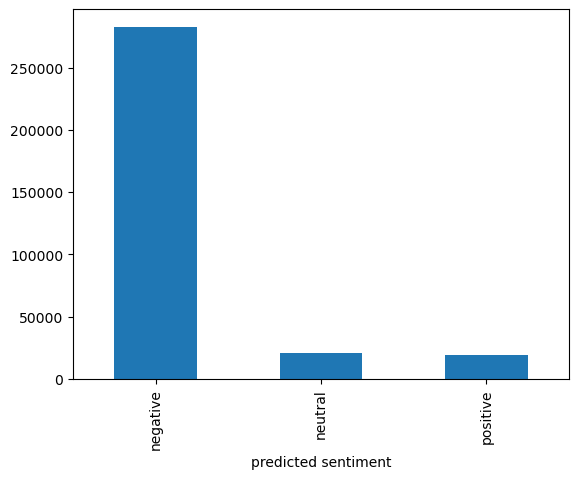

In [24]:
df2.groupby('predicted sentiment').size().plot(kind='bar')

In [25]:
len(df2['predicted sentiment'])

322887

## b. Distribution of sentiments per state

<AxesSubplot:xlabel='State'>

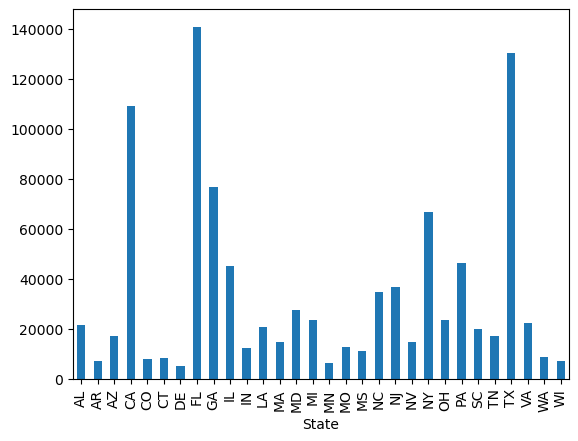

In [26]:
grouped = df.groupby('State').size()
filtered = grouped[grouped > 5000]
filtered.plot(kind='bar')

In [27]:
grouped = df2.groupby('State').size()
filtered = grouped[grouped > 5000].index
filtered_df2 = df2[df2['State'].isin(filtered)]
grouped_sentiment = filtered_df2.groupby('State')['VADER score'].mean()
print(grouped_sentiment)

State
AL    0.077654
AZ    0.114850
CA    0.082504
FL    0.099872
GA    0.079581
IL    0.039776
LA    0.054877
MD    0.118328
MI    0.043355
NC    0.077885
NJ    0.120044
NV    0.108533
NY    0.087985
OH    0.116988
PA    0.119958
SC    0.054490
TN    0.068704
TX    0.102365
VA    0.098156
Name: VADER score, dtype: float64


In [28]:
df2

,Consumer complaint narrative,Issue,product,State,Tokenized Text,Stemmed,VADER score,predicted sentiment
27,ive consistently made payments time account ca...,Incorrect information on your report,Credit reporting,NJ,"[ive, consistently, made, payments, time, acco...","[ive, consist, made, payment, time, account, c...",-0.6103,negative
28,xxxx xxxx submitting cfpb complaint today foll...,Incorrect information on your report,Credit reporting,AR,"[xxxx, xxxx, submitting, cfpb, complaint, toda...","[xxxx, xxxx, submit, cfpb, complaint, today, f...",-0.7717,negative
53,company states following apple card customer x...,Trouble using your card,General-purpose credit card or charge card,VA,"[company, states, following, apple, card, cust...","[compani, state, follow, appl, card, custom, x...",0.9846,negative
97,recently received copy credit report noticed u...,Incorrect information on your report,Credit reporting,FL,"[recently, received, copy, credit, report, not...","[recent, receiv, copi, credit, report, notic, ...",0.2732,negative
101,trying dispute incorrect andor invalid items l...,Incorrect information on your report,Credit reporting,AK,"[trying, dispute, incorrect, andor, invalid, i...","[tri, disput, incorrect, andor, invalid, item,...",0.5994,negative
...,...,...,...,...,...,...,...,...
1048566,divorced xxxx 2015 part decree exspouse awarde...,Problem with a credit reporting company's inve...,Credit reporting,TX,"[divorced, xxxx, 2015, part, decree, exspouse,...","[divorc, xxxx, 2015, part, decre, exspous, awa...",0.9766,negative
1048567,xxxx2017 approximately xxxx xxxx contacted hil...,Communication tactics,Other debt,GA,"[xxxx2017, approximately, xxxx, xxxx, contacte...","[xxxx2017, approxim, xxxx, xxxx, contact, hill...",-0.8722,negative
1048571,last year found lot information credit bureaus...,Incorrect information on your report,Credit reporting,MO,"[last, year, found, lot, information, credit, ...","[last, year, found, lot, inform, credit, burea...",-0.8348,negative
1048572,wife separated since xxxx hold title home join...,Trouble during payment process,Conventional home mortgage,OH,"[wife, separated, since, xxxx, hold, title, ho...","[wife, separ, sinc, xxxx, hold, titl, home, jo...",-0.1783,negative


In [29]:
grouped = df2.groupby('Issue').size()
filtered = grouped[grouped > 1000].index
filtered_df2 = df2[df2['Issue'].isin(filtered)]
grouped_sentiment = filtered_df2.groupby('Issue')['VADER score'].mean()
print(grouped_sentiment)

Issue
Advertising and marketing, including promotional offers                             0.661198
Applying for a mortgage or refinancing an existing mortgage                         0.283091
Attempts to collect debt not owed                                                  -0.104350
Closing an account                                                                 -0.061893
Closing on a mortgage                                                               0.192572
Closing your account                                                                0.337969
Communication tactics                                                              -0.383858
Credit monitoring or identity theft protection services                             0.257768
Dealing with your lender or servicer                                                0.233508
False statements or representation                                                 -0.101927
Fees or interest                                                

There seem to be differences between the scores depending on the issue submitted.

In [30]:
import scipy.stats as stats
groups = [group['VADER score'].values for name, group in filtered_df2.groupby('Issue')]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 443.17154146698766
P-value: 0.0


ANOVA tests were conducted to understand whether the sentiment scores vary significantly between complaint issues and states, and confirmed that such differences exist from the F-statistic and P-value, respectively.


The result suggests that there are indeed some differences between obtained scores. Let us carry out the pairwise analysis:

In [31]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

grouped_issues = df2.groupby('Issue').size()
filtered_issues = grouped_issues[grouped_issues > 1000].index
filtered_issues = df2[df2['Issue'].isin(filtered_issues)]

groups = [group['VADER score'].values for name, group in filtered_issues.groupby('Issue')]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    data = filtered_issues['VADER score'].values
    labels = filtered_issues['Issue'].values
    tukey = pairwise_tukeyhsd(endog=data, groups=labels, alpha=0.05)
    significant_pairs = sum(tukey.reject)
    insignificant_pairs = len(tukey.reject) - significant_pairs

    print(f"Number of significant pairs: {significant_pairs}")
    print(f"Number of insignificant pairs: {insignificant_pairs}")
else:
    print("The score's difference from the other scores is not statistically significant.")

F-statistic: 443.17154146698766
P-value: 0.0
Number of significant pairs: 514
Number of insignificant pairs: 81


A Tukey HSD test was used to explore the pairs of groups-issue or state pairs-that were significantly different from each other by their sentiment score. In most cases, the pairwise comparisons are significant when complaint issues are considered, while fewer significant differences arise in the state-based analysis, indicating lesser variability among states.
According to the pairwise analysis, the majority of differences between pairs are significant. Thus we can conclude that the type of issue reported does matter when predicting its VADER Score (sentiment).
Let us repeat the above for states.

In [32]:
grouped = df2.groupby('State').size()
filtered = grouped[grouped > 1000].index
filtered_df2 = df2[df2['State'].isin(filtered)]
grouped_sentiment = filtered_df2.groupby('State')['VADER score'].mean()
print(grouped_sentiment)

State
AL    0.077654
AR    0.154939
AZ    0.114850
CA    0.082504
CO    0.112722
CT    0.076851
DC    0.132197
DE    0.117848
FL    0.099872
GA    0.079581
IL    0.039776
IN    0.074026
KS    0.027842
KY    0.097208
LA    0.054877
MA    0.156923
MD    0.118328
MI    0.043355
MN    0.101985
MO    0.077260
MS    0.023680
NC    0.077885
NJ    0.120044
NV    0.108533
NY    0.087985
OH    0.116988
OK    0.060833
OR    0.094511
PA    0.119958
SC    0.054490
TN    0.068704
TX    0.102365
UT    0.059330
VA    0.098156
WA    0.092697
WI    0.089556
Name: VADER score, dtype: float64


In [33]:
import scipy.stats as stats
groups = [group['VADER score'].values for name, group in filtered_df2.groupby('State')]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 11.811144574605498
P-value: 3.8881194590296054e-66


In [34]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

grouped_states = df2.groupby('State').size()
filtered_states = grouped_states[grouped_states > 1000].index
filtered_df2 = df2[df2['State'].isin(filtered_states)]
groups = [group['VADER score'].values for name, group in filtered_df2.groupby('State')]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    data = filtered_df2['VADER score'].values
    labels = filtered_df2['State'].values.astype(str)
    tukey = pairwise_tukeyhsd(endog=data, groups=labels, alpha=0.05)
    significant_pairs = sum(tukey.reject)
    insignificant_pairs = len(tukey.reject) - significant_pairs

    print(f"Number of significant pairs: {significant_pairs}")
    print(f"Number of insignificant pairs: {insignificant_pairs}")
else:
    print("The score's difference from the other scores is not statistically significant.")

F-statistic: 11.811144574605498
P-value: 3.8881194590296054e-66
Number of significant pairs: 138
Number of insignificant pairs: 492


In the case of states, while differences in mean sentiments are revealed upon analysis, the majority of pairwise differences are not statistically significant. On a more detailed level, we could try to analyze differences between specific states, however, overall - differences are not a common occurrence and cannot be said to typically occur.

# 4.Visualization and Reporting

In [35]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

<h3>Word Clouds of most commonly appearing occurrences</h3>

The Word Clouds of positive and negative sentiments were generated from the narratives. The visual depicted words that appeared commonly, excluding stopwords and service-related terms, giving a qualitative look into what is contained within positive and negative sentiment narratives.

In [36]:
neg = df2[df2['predicted sentiment']=='negative']

words = ' '.join(df['Consumer complaint narrative'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("service")
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

In [37]:
pd.set_option('display.max_colwidth', None)
random_narratives = neg['Consumer complaint narrative'].sample(n=5)

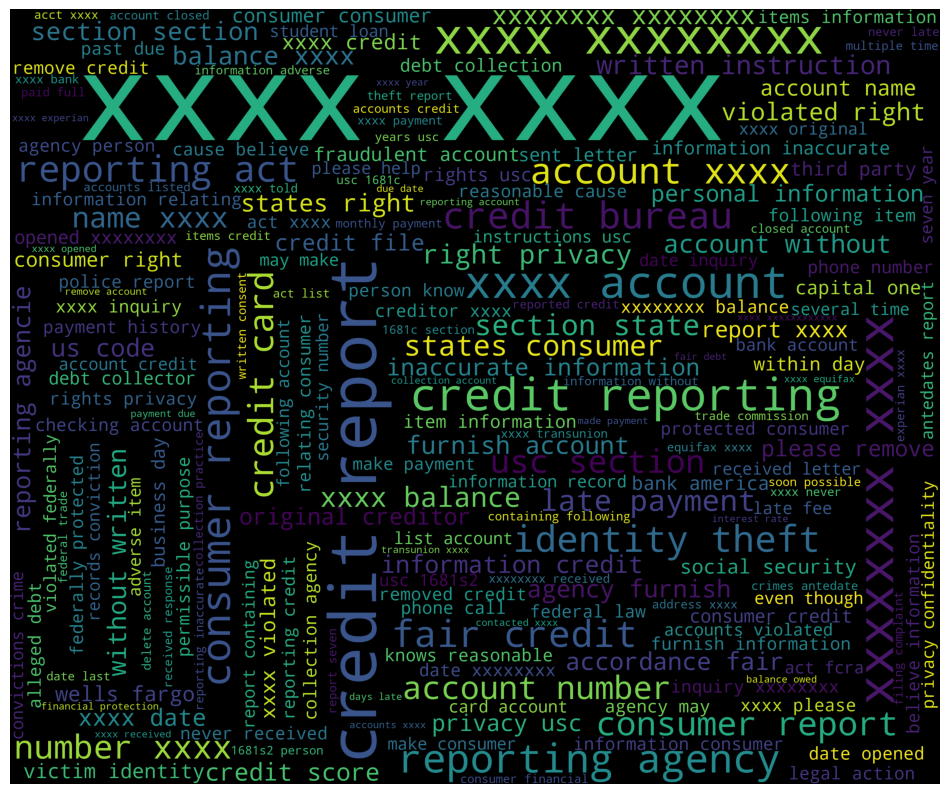

In [38]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

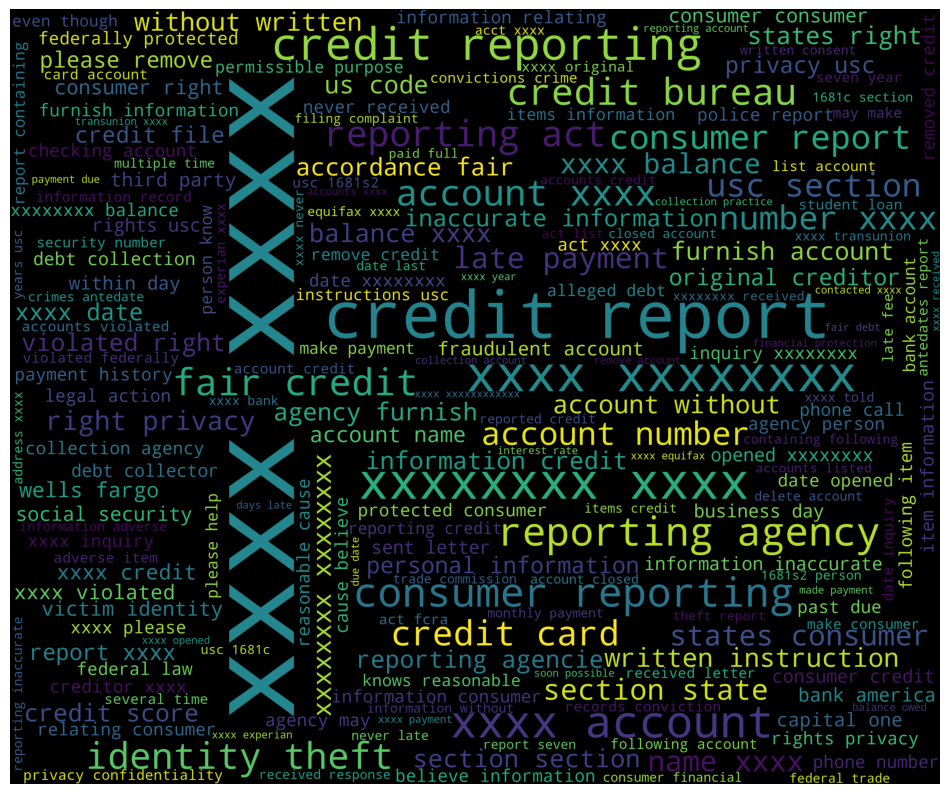

In [40]:
pos = df2[df2['predicted sentiment']=='positive']

words = ' '.join(df['Consumer complaint narrative'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("service")
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can see based on the above word clouds that there are no obvious differences between complaints characterized by negative and positive sentiment. No stronger words appear. It does seem interesting that, unlike in the case of e.g., restaurant reviews, in the case of financial institutions complaints, no extreme emotionally loaded descriptives appear. It is probably linked to the very specific form of this kind of complaints.

### The conclusion following from the above analysis:
The most commonly used words are formal and rather neutral no matter the predicated sentiment. The emotionally loaded words('violated', 'victim', 'never received', 'violated right' etc.) are of secondary importance in the obtained word clouds. Moreover, the dominant words in the positive sentiment complaints are still somewhat negative.
Listing multiple random user complaints (tokenized etc., but sense retained) does not change this conclusion - complaints are formal, rarely contain emotional words and fail to reveal many interesting differences.

This analysis shows that the sentiment expressed in consumer complaints depends a lot on the type of issue reported and, to a lesser degree, on the complainant's state. For example, issues such as "Attempts to collect debt not owed" had, on average, negative sentiment, while complaints about "Trouble using your card" were more positive. This would suggest that problem nature bears on how consumers perceive and describe their experiences and could inform financial institutions' targeted interventions.

The state-based analysis shows, while there exist several differences in the average sentiment score, they are not that dramatic, which might underpin a more uniform approach of financial service providers across states or similar consumer expectations nationwide. However, significant variation in a minority of comparisons suggests further exploration may be productive regarding region-specific challenges.

Finally, the word cloud and narrative samples intuitively convey an understanding of the major themes and consumer concerns present within the dataset. These will help financial institutions and regulators in improving their complaint-handling processes by addressing repeated issues that pop up, hence gaining more trust among consumers. The project shows how important sentiment analysis and statistical methods can be in discovering actionable insights from large-scale textual data.